<a href="https://colab.research.google.com/github/whoislimshady/Data_analysis/blob/main/implementing_and_hyperparameter_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [ ]:
df.describe()

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [ ]:
df.dtypes

f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object

In [ ]:
df['f1'] = pd.to_numeric(df['f1'].str.replace(',',''), errors='coerce')
df['f2'] = pd.to_numeric(df['f2'].str.replace(',',''), errors='coerce')
df['f4'] = pd.to_numeric(df['f4'].str.replace(',',''), errors='coerce')
df['f5'] = pd.to_numeric(df['f5'].str.replace(',',''), errors='coerce')
df['f6'] = pd.to_numeric(df['f6'].str.replace(',',''), errors='coerce')
df['f7'] = pd.to_numeric(df['f7'].str.replace(',',''), errors='coerce')

df['f7'] = df['f7'].astype(float)
df['f3'] = df['f3'].astype(float)

In [ ]:
import seaborn as sns

corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,f1,f2,f3,f4,f5,f6,f7,target
f1,1.000000,0.125324,0.140992,-0.082411,-0.075453,0.017251,-0.031238,0.221289
f2,0.125324,1.000000,0.151819,0.057746,0.332530,0.218293,0.137758,0.464187
f3,0.140992,0.151819,1.000000,0.207170,0.088694,0.281555,0.041547,0.064623
f4,-0.082411,0.057746,0.207170,1.000000,0.438003,0.393701,0.182354,0.078258
f5,-0.075453,0.332530,0.088694,0.438003,1.000000,0.198111,0.184493,0.128934
f6,0.017251,0.218293,0.281555,0.393701,0.198111,1.000000,0.140034,0.292533
f7,-0.031238,0.137758,0.041547,0.182354,0.184493,0.140034,1.000000,0.173697
target,0.221289,0.464187,0.064623,0.078258,0.128934,0.292533,0.173697,1.000000


<Axes: >

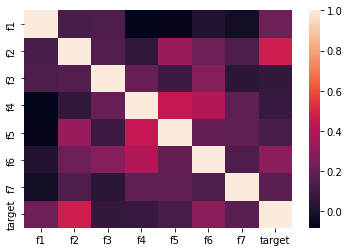

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df = df.dropna()
df.isnull().sum(axis = 0)

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

In [ ]:
df['f1']= StandardScaler().fit_transform(df['f1'].values.reshape(-1,1))
df['f2']= StandardScaler().fit_transform(df['f2'].values.reshape(-1,1))
df['f3']= StandardScaler().fit_transform(df['f3'].values.reshape(-1,1))
df['f4']= StandardScaler().fit_transform(df['f4'].values.reshape(-1,1))
df['f5']= StandardScaler().fit_transform(df['f5'].values.reshape(-1,1))
df['f6']= StandardScaler().fit_transform(df['f6'].values.reshape(-1,1))
df['f7']= StandardScaler().fit_transform(df['f7'].values.reshape(-1,1))

NameError: ignored

In [ ]:

np.random.seed(1234)
X = df.drop(labels='target',axis=1)
Y = df.target

In [ ]:

x_train,x_test,y_train,y_test = train_test_split( X, Y, test_size=0.2 )
print(x_train.shape)
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)


(608, 7)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[7]),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00000001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 7)                 0         
                                                                 
 dense_6 (Dense)             (None, 64)                512       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.fit(x_train, y_train, 
                    batch_size = 5,
                    epochs=5,verbose=0,
                    validation_data=(x_test, y_test))

print(f"Train acc :{model.evaluate(x_train, y_train, verbose=0)[1]}")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test set: {score[1]}")

Train acc :0.3486842215061188
Accuracy on test set: 0.3552631437778473


#Tuning Dropout 

---



In [ ]:
def get_model(drop):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[7]),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  return model

DropoutParameter = [0.25,0.5,0.75] # list of dropoout value to try
for i in range(len(DropoutParameter)):
  model = get_model(DropoutParameter[i])
  print(f"\n\nCompiling and Training model for dropout value {DropoutParameter[i]} \n")
  model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])
  results = model.fit(x_train, y_train, batch_size = 1,epochs=10,verbose=1,validation_data=(x_test, y_test))
  print(f"Train acc :{model.evaluate(x_train, y_train, verbose=0)[1]}")
  score = model.evaluate(x_test, y_test, verbose=0)
  print(f"Accuracy on test set: {score[1]}")



Compiling and Training model for dropout value 0.25 

Epoch 1/10
608/608 [==============================] - 3s 3ms/step - loss: 0.6636 - accuracy: 0.6595 - val_loss: 0.6354 - val_accuracy: 0.6513
Epoch 2/10
608/608 [==============================] - 2s 3ms/step - loss: 0.6239 - accuracy: 0.6678 - val_loss: 0.6045 - val_accuracy: 0.6776
Epoch 3/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5950 - accuracy: 0.7204 - val_loss: 0.5814 - val_accuracy: 0.6908
Epoch 4/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5724 - accuracy: 0.7237 - val_loss: 0.5638 - val_accuracy: 0.7039
Epoch 5/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.7368 - val_loss: 0.5495 - val_accuracy: 0.7237
Epoch 6/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5374 - accuracy: 0.7533 - val_loss: 0.5389 - val_accuracy: 0.7434
Epoch 7/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5262 - accuracy:

#

#Changing Optimizer

#SGD

In [ ]:
def get_model(drop):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[7]),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  return model

drop = 0.25 #using the best dropout 

model = get_model(drop)
print(f"\n\nCompiling and Training model for SGD  and dropout value {drop} \n")
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])
results = model.fit(x_train, y_train, batch_size = 1,epochs=10,verbose=1,validation_data=(x_test, y_test))
print(f"Train acc :{model.evaluate(x_train, y_train, verbose=1)[1]}")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test set: {score[1]}")



Compiling and Training model for SGD  and dropout value 0.25 

Epoch 1/10
608/608 [==============================] - 2s 2ms/step - loss: 0.6492 - accuracy: 0.6234 - val_loss: 0.6250 - val_accuracy: 0.6842
Epoch 2/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5956 - accuracy: 0.7122 - val_loss: 0.5916 - val_accuracy: 0.7171
Epoch 3/10
608/608 [==============================] - 2s 3ms/step - loss: 0.5695 - accuracy: 0.7484 - val_loss: 0.5698 - val_accuracy: 0.7303
Epoch 4/10
608/608 [==============================] - 2s 3ms/step - loss: 0.5546 - accuracy: 0.7484 - val_loss: 0.5541 - val_accuracy: 0.7303
Epoch 5/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5393 - accuracy: 0.7533 - val_loss: 0.5422 - val_accuracy: 0.7303
Epoch 6/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.7730 - val_loss: 0.5321 - val_accuracy: 0.7368
Epoch 7/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5192 - 

#ADAM

In [ ]:
def get_model(drop):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[7]),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  return model

drop = 0.25 #using the best dropout 

model = get_model(drop)
print(f"\n\nCompiling and Training model for ADAM  and dropout value {drop} \n")
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
results = model.fit(x_train, y_train, batch_size = 1,epochs=10,verbose=1,validation_data=(x_test, y_test))
print(f"Train acc :{model.evaluate(x_train, y_train, verbose=1)[1]}")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test set: {score[1]}")



Compiling and Training model for ADAM  and dropout value 0.25 

Epoch 1/10
608/608 [==============================] - 2s 3ms/step - loss: 0.5799 - accuracy: 0.7122 - val_loss: 0.5396 - val_accuracy: 0.7368
Epoch 2/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5106 - accuracy: 0.7615 - val_loss: 0.5317 - val_accuracy: 0.7237
Epoch 3/10
608/608 [==============================] - 2s 3ms/step - loss: 0.4793 - accuracy: 0.7845 - val_loss: 0.5261 - val_accuracy: 0.7368
Epoch 4/10
608/608 [==============================] - 2s 4ms/step - loss: 0.4873 - accuracy: 0.7763 - val_loss: 0.5222 - val_accuracy: 0.7105
Epoch 5/10
608/608 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.7845 - val_loss: 0.5408 - val_accuracy: 0.7171
Epoch 6/10
608/608 [==============================] - 1s 2ms/step - loss: 0.4793 - accuracy: 0.7780 - val_loss: 0.5209 - val_accuracy: 0.7171
Epoch 7/10
608/608 [==============================] - 1s 2ms/step - loss: 0.4715 -

#RMS *PROP*

In [ ]:
def get_model(drop):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[7]),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  return model

drop = 0.25 #using the best dropout 

model = get_model(drop)
print(f"\n\nCompiling and Training model for RMSprop  and dropout value {drop} \n")
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
results = model.fit(x_train, y_train, batch_size = 1,epochs=10,verbose=1,validation_data=(x_test, y_test))
print(f"Train acc :{model.evaluate(x_train, y_train, verbose=1)[1]}")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test set: {score[1]}")



Compiling and Training model for RMSprop  and dropout value 0.25 

Epoch 1/10
608/608 [==============================] - 3s 3ms/step - loss: 0.5455 - accuracy: 0.7451 - val_loss: 0.5430 - val_accuracy: 0.7237
Epoch 2/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5454 - accuracy: 0.7664 - val_loss: 0.5917 - val_accuracy: 0.7303
Epoch 3/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7714 - val_loss: 0.5599 - val_accuracy: 0.7303
Epoch 4/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5049 - accuracy: 0.7961 - val_loss: 0.6828 - val_accuracy: 0.7303
Epoch 5/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.7697 - val_loss: 0.6339 - val_accuracy: 0.7237
Epoch 6/10
608/608 [==============================] - 1s 2ms/step - loss: 0.5257 - accuracy: 0.7895 - val_loss: 0.6210 - val_accuracy: 0.7368
Epoch 7/10
608/608 [==============================] - 1s 2ms/step - loss: 0.526

#Changing the activation function using rms prop as it is giving best acc
#relu->relu->tanh

In [ ]:
def get_model(drop):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[7]),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(1,activation='tanh')
  ])
  return model

drop = 0.25 #using the best dropout 

model = get_model(drop)
print(f"\n\nCompiling and Training model for RMSprop  and dropout value {drop} \n")
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
results = model.fit(x_train, y_train, batch_size = 1,epochs=10,verbose=1,validation_data=(x_test, y_test))
print(f"Train acc :{model.evaluate(x_train, y_train, verbose=1)[1]}")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test set: {score[1]}")



Compiling and Training model for RMSprop  and dropout value 0.25 

Epoch 1/10
608/608 [==============================] - 2s 3ms/step - loss: 1.4270 - accuracy: 0.7368 - val_loss: 1.1458 - val_accuracy: 0.7303
Epoch 2/10
608/608 [==============================] - 2s 3ms/step - loss: 1.4086 - accuracy: 0.7566 - val_loss: 1.3548 - val_accuracy: 0.7368
Epoch 3/10
608/608 [==============================] - 2s 3ms/step - loss: 1.7904 - accuracy: 0.7730 - val_loss: 1.9923 - val_accuracy: 0.7566
Epoch 4/10
608/608 [==============================] - 1s 2ms/step - loss: 1.6076 - accuracy: 0.7780 - val_loss: 2.1048 - val_accuracy: 0.7500
Epoch 5/10
608/608 [==============================] - 1s 2ms/step - loss: 1.6556 - accuracy: 0.7714 - val_loss: 2.3229 - val_accuracy: 0.7632
Epoch 6/10
608/608 [==============================] - 1s 2ms/step - loss: 1.8036 - accuracy: 0.7845 - val_loss: 2.5057 - val_accuracy: 0.7434
Epoch 7/10
608/608 [==============================] - 1s 2ms/step - loss: 2.160

#softmax->softmax->sigmoid

In [ ]:
def get_model(drop):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[7]),
      tf.keras.layers.Dense(64,activation='softmax'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(64,activation='softmax'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  return model

drop = 0.25 #using the best dropout 

model = get_model(drop)
print(f"\n\nCompiling and Training model for RMSprop  and dropout value {drop} \n")
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
results = model.fit(x_train, y_train, batch_size = 1,epochs=10,verbose=1,validation_data=(x_test, y_test))
print(f"Train acc :{model.evaluate(x_train, y_train, verbose=1)[1]}")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test set: {score[1]}")



Compiling and Training model for RMSprop  and dropout value 0.25 

Epoch 1/10
608/608 [==============================] - 2s 3ms/step - loss: 0.6716 - accuracy: 0.6513 - val_loss: 0.6609 - val_accuracy: 0.6447
Epoch 2/10
608/608 [==============================] - 2s 3ms/step - loss: 0.6539 - accuracy: 0.6513 - val_loss: 0.6527 - val_accuracy: 0.6447
Epoch 3/10
608/608 [==============================] - 2s 3ms/step - loss: 0.6484 - accuracy: 0.6513 - val_loss: 0.6506 - val_accuracy: 0.6447
Epoch 4/10
608/608 [==============================] - 1s 2ms/step - loss: 0.6471 - accuracy: 0.6513 - val_loss: 0.6503 - val_accuracy: 0.6447
Epoch 5/10
608/608 [==============================] - 1s 2ms/step - loss: 0.6474 - accuracy: 0.6513 - val_loss: 0.6505 - val_accuracy: 0.6447
Epoch 6/10
608/608 [==============================] - 1s 2ms/step - loss: 0.6457 - accuracy: 0.6513 - val_loss: 0.6503 - val_accuracy: 0.6447
Epoch 7/10
608/608 [==============================] - 1s 2ms/step - loss: 0.646

#softplus->softplus->tanh

In [ ]:
def get_model(drop):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[7]),
      tf.keras.layers.Dense(64,activation='softmax'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(64,activation='softmax'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(1,activation='tanh')
  ])
  return model

drop = 0.25 #using the best dropout 

model = get_model(drop)
print(f"\n\nCompiling and Training model for RMSprop  and dropout value {drop} \n")
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
results = model.fit(x_train, y_train, batch_size = 1,epochs=10,verbose=1,validation_data=(x_test, y_test))
print(f"Train acc :{model.evaluate(x_train, y_train, verbose=1)[1]}")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test set: {score[1]}")



Compiling and Training model for RMSprop  and dropout value 0.25 

Epoch 1/10
608/608 [==============================] - 2s 3ms/step - loss: 1.0206 - accuracy: 0.6513 - val_loss: 0.6619 - val_accuracy: 0.6447
Epoch 2/10
608/608 [==============================] - 1s 2ms/step - loss: 0.6540 - accuracy: 0.6513 - val_loss: 0.6512 - val_accuracy: 0.6447
Epoch 3/10
608/608 [==============================] - 2s 4ms/step - loss: 0.6457 - accuracy: 0.6513 - val_loss: 0.6494 - val_accuracy: 0.6447
Epoch 4/10
608/608 [==============================] - 4s 7ms/step - loss: 0.6410 - accuracy: 0.6513 - val_loss: 0.6400 - val_accuracy: 0.6447
Epoch 5/10
608/608 [==============================] - 4s 6ms/step - loss: 0.6328 - accuracy: 0.6513 - val_loss: 0.6281 - val_accuracy: 0.6447
Epoch 6/10
608/608 [==============================] - 3s 5ms/step - loss: 0.6155 - accuracy: 0.6513 - val_loss: 0.6132 - val_accuracy: 0.6447
Epoch 7/10
608/608 [==============================] - 3s 5ms/step - loss: 0.593

#changing the initializer

In [ ]:
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

NameError: ignored

In [ ]:
def get_model(drop):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[7]),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(drop),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  return model

drop = 0.25 #using the best dropout 

model = get_model(drop)
print(f"\n\nCompiling and Training model for RMSprop  and dropout value {drop} \n")
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
results = model.fit(x_train, y_train, batch_size = 1,epochs=10,verbose=1,validation_data=(x_test, y_test))
print(f"Train acc :{model.evaluate(x_train, y_train, verbose=1)[1]}")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test set: {score[1]}")